# Student Performance Analysis
    
   **Lifecycle of Machine Learning Project:**<br>
   -Understand the problem statement<br>
   -Data Collection<br>
   -Data checks to perform<br>
   -Exploratory Data Analysis<br>
   -Data preprocessing<br>
   -Model training<br>
   -Choose best Model<br>
   -Deploy the model<br>
   

## 1.Problem Statement
Determining the influence of gender,ethnicity,parental_background,etc... on the test performance of student and to make perdictions of test result using that factors.

## 2.Understanding the dataset

In [1]:
!pwd

/Users/anushwork/Desktop/Projects/MLBased/Model/E2E/notebook


In [2]:
!ls

EDA_Student_Performance_Dataset.ipynb stud.csv
EDA_student_performance.ipynb


In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("stud.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h3>2.1 Data information</h3>
    <p>This data is student test performance dataset which tries to tell the story of <strong>test result and their relation with gender,race/ethnicity,parental_education,etc..</strong></p>
<ul>
    <li>It has <strong>1000 entries and 8 properties.</strong></li>
    <li>It has <strong>no null values.</strong></li>
    <li>Data types : <strong>String : 5 cloumns , Integer : 3 columns.</strong></li>
    <li>Three result column(Integer) :<strong>math_score, reading_score, writing_score.</strong></li>
</ul>
    <p>Data Source:</p>
    <a href="https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977">Kaggle Link</a>

<h3>2.2 Column information #to add<h3>

## 3.Exploring data

In [6]:
data.shape

(1000, 8)

In [7]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The mean varies between 66 to 69.<br>
The standard deviation is also around 14 and 15.<br>
According to the stats we can infer that marks is given between 0 to 100.

In [11]:
data.select_dtypes(include=object).nunique()

gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64

Let us see the above classes in detail.

In [12]:
for col in data.select_dtypes(include=object).columns:
    print(f"Categorical values in {col}: ",end = " ")
    print(data[col].unique())
    print()

Categorical values in gender:  ['female' 'male']

Categorical values in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categorical values in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categorical values in lunch:  ['standard' 'free/reduced']

Categorical values in test_preparation_course:  ['none' 'completed']



### 3.1 Adding the "total_score" and "average_score" column

In [13]:
data['total_score'] = data[["math_score","reading_score","writing_score"]].sum(axis=1)
data['avg_score'] = data['total_score']/3

In [14]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 4 Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data.describe()

,math_score,reading_score,writing_score,total_score,avg_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


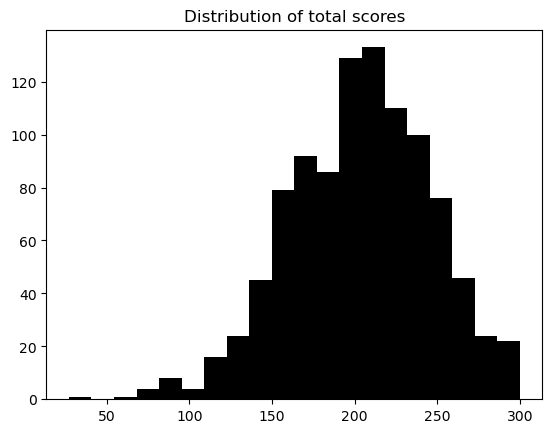

In [17]:
plt.hist(data['total_score'], color = 'black', bins=20)
plt.title("Distribution of total scores")
plt.show()

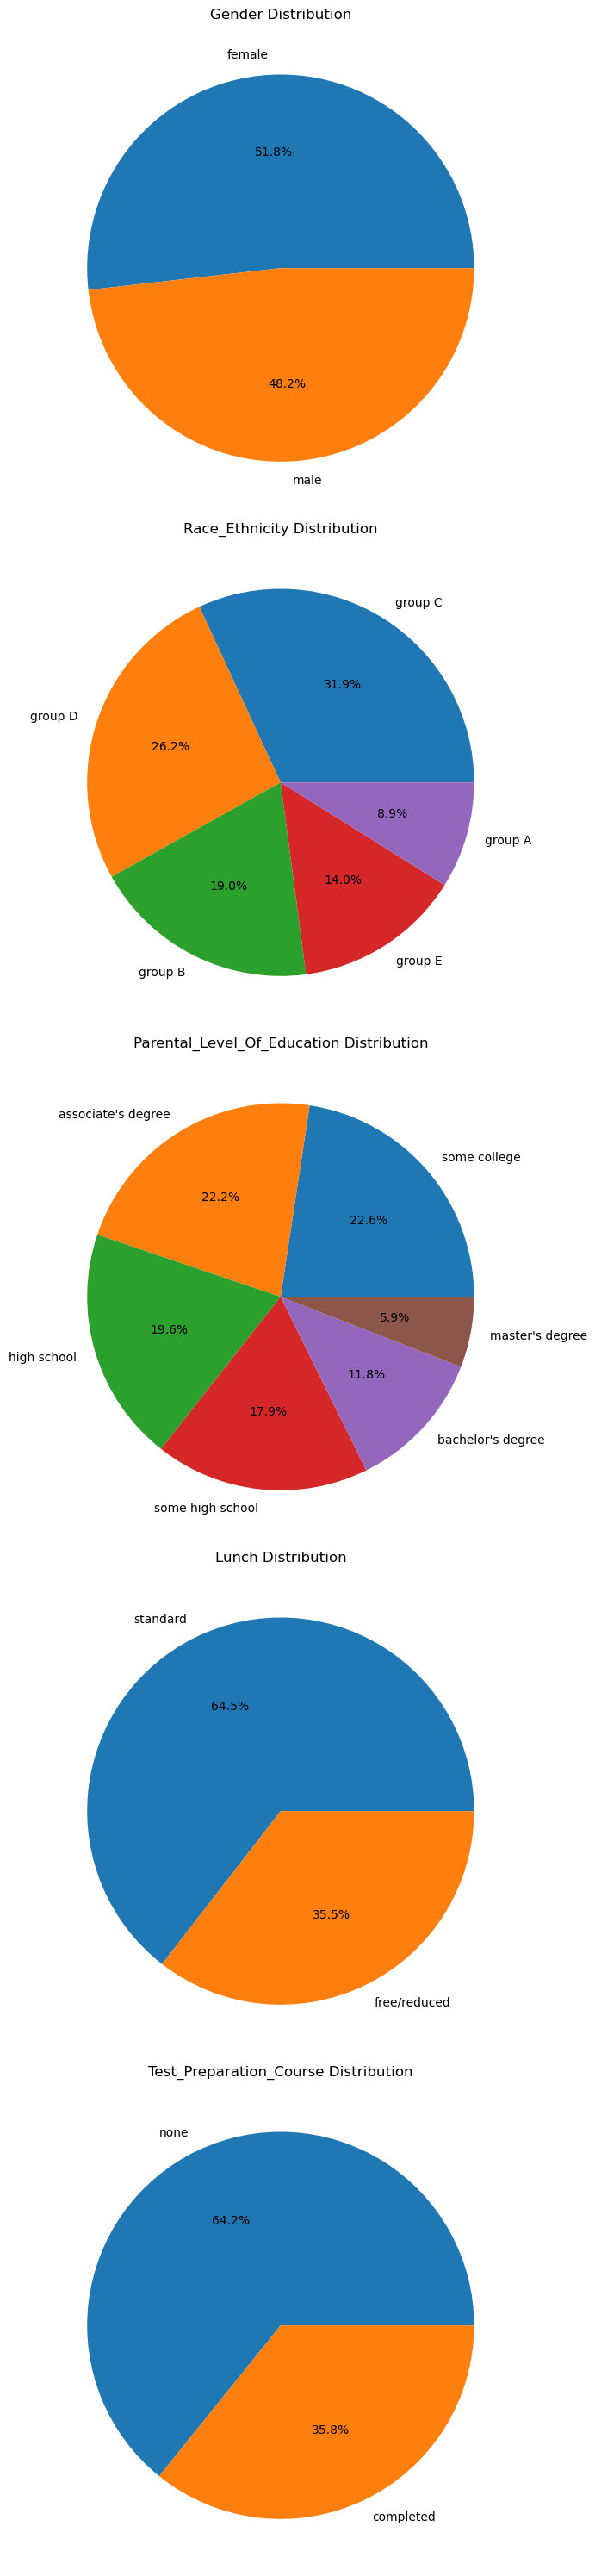

In [18]:
fig , axs = plt.subplots(5,1,figsize=(15,30))
i = 0
for att in data.select_dtypes(include=object):
    dist = data[att].value_counts()
    axs[i].pie(x=dist.values,labels=dist.index,autopct='%1.1f%%')
    axs[i].set_title(f"{att.title()} Distribution")
    i+=1

plt.tight_layout()
plt.show()


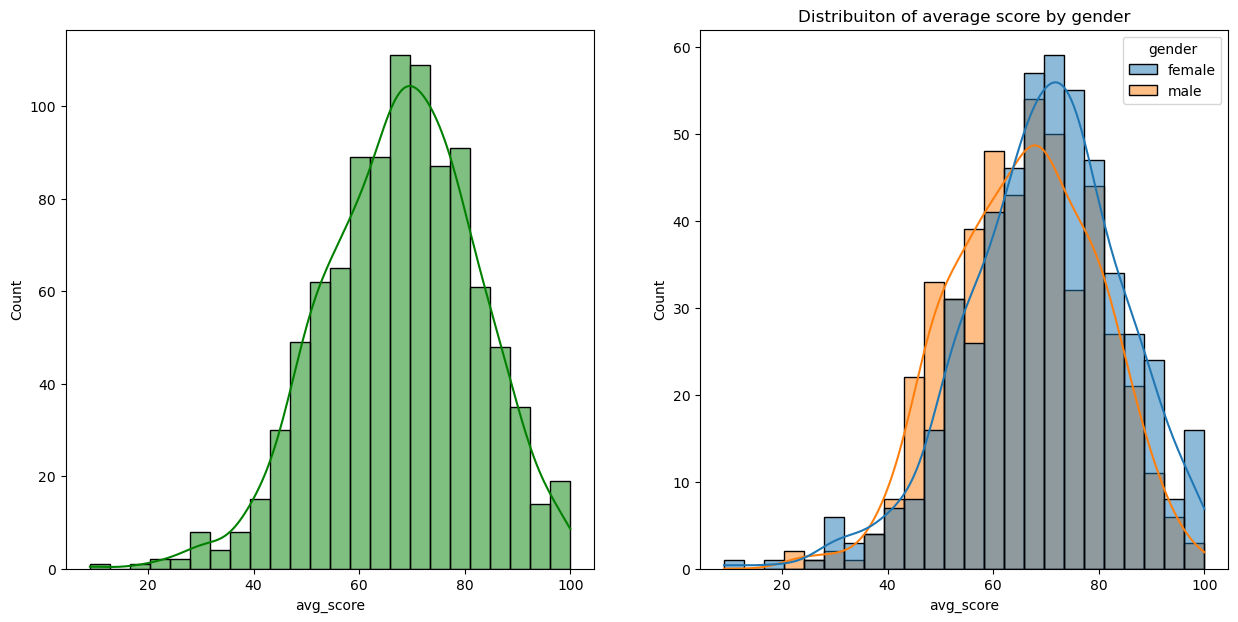

In [19]:
fig , axs = plt.subplots(1,2,figsize=(15,7))
plt.title("Distribuiton of average score")
sns.histplot(data=data , x = data['avg_score'] , color = 'g', kde = True , ax = axs[0])
sns.histplot(data = data, x = data["avg_score"] , color = 'b' , kde = True , hue = data['gender'])
plt.title("Distribuiton of average score by gender")
plt.show()

**Observation 1** : We can observe that the females performed better compared to males by the considrable margin.

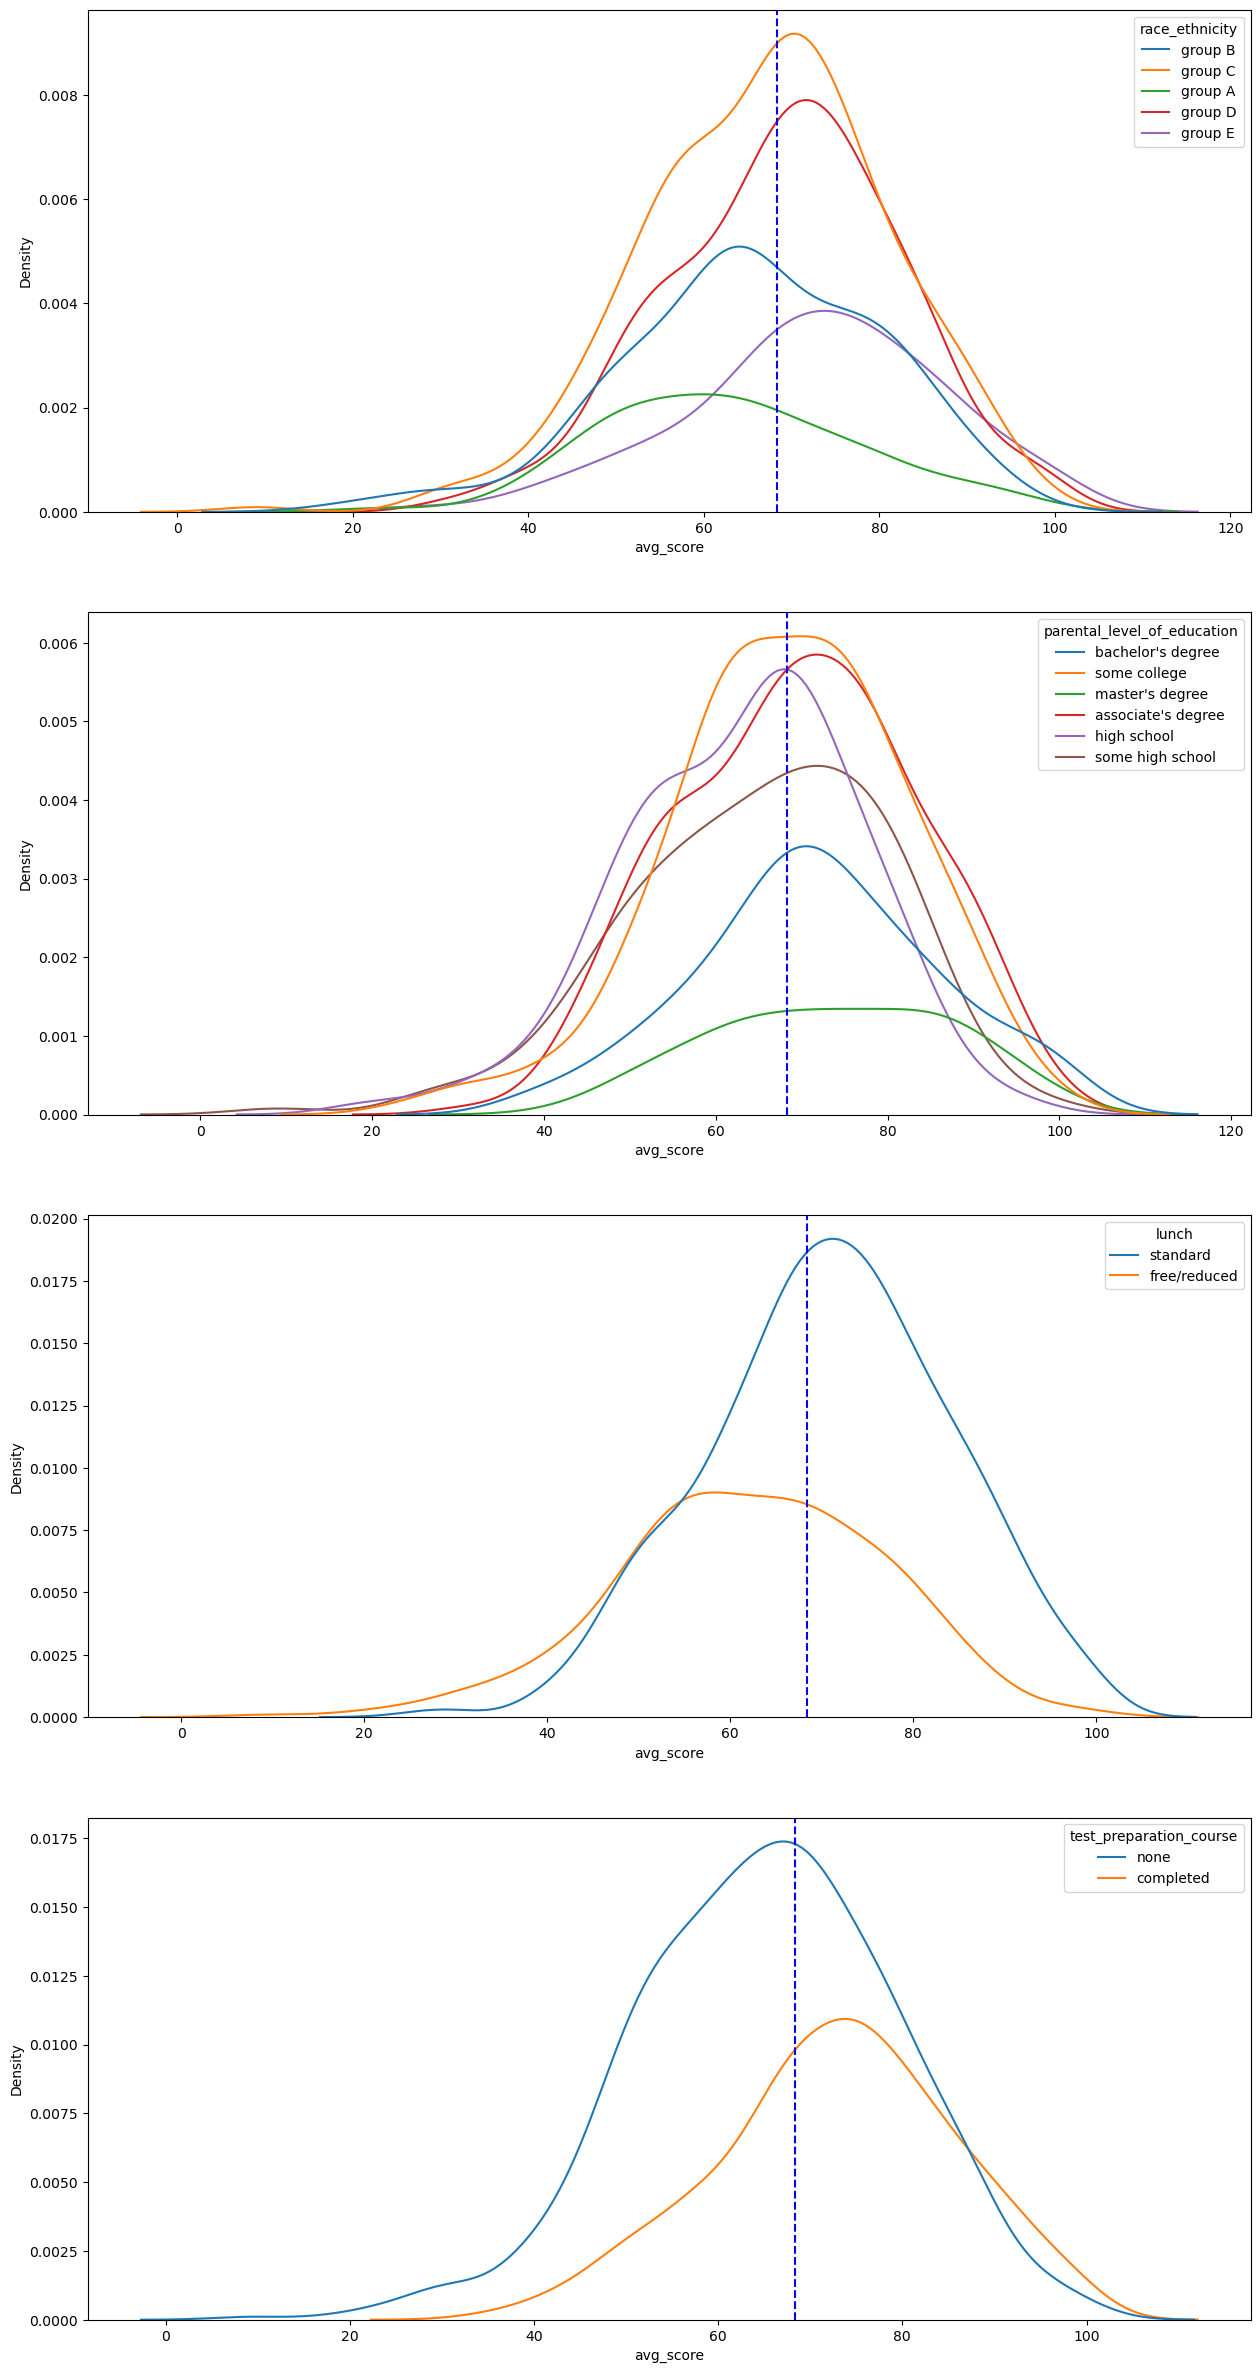

In [20]:
fig,axs = plt.subplots(4,1,figsize=(15,30))
i = 0
med = np.median(data["avg_score"])
for att in data.select_dtypes(include="object"):
    if att != "gender":
        sns.kdeplot(data=data,x=data["avg_score"],ax=axs[i],hue = data[att])
        axs[i].axvline(med,color='b',linestyle="--",label=f"Median : {med:.2f}")
        i+=1


**Observation 2** : Individuals from Group A & Group B were performing worse than other group ethinicity.</br>
**Observation 3** : According to the data it seemed that parents education had little has no significant affect in the child's test score, while there seem few advantage of parents having masters degree.</br>
**Observation 4** : Individuals having standard lunch outperformed those with free/reduced lunch.</br>
**Observation 5** : The students with test preparation course outperformed those with none.</br>

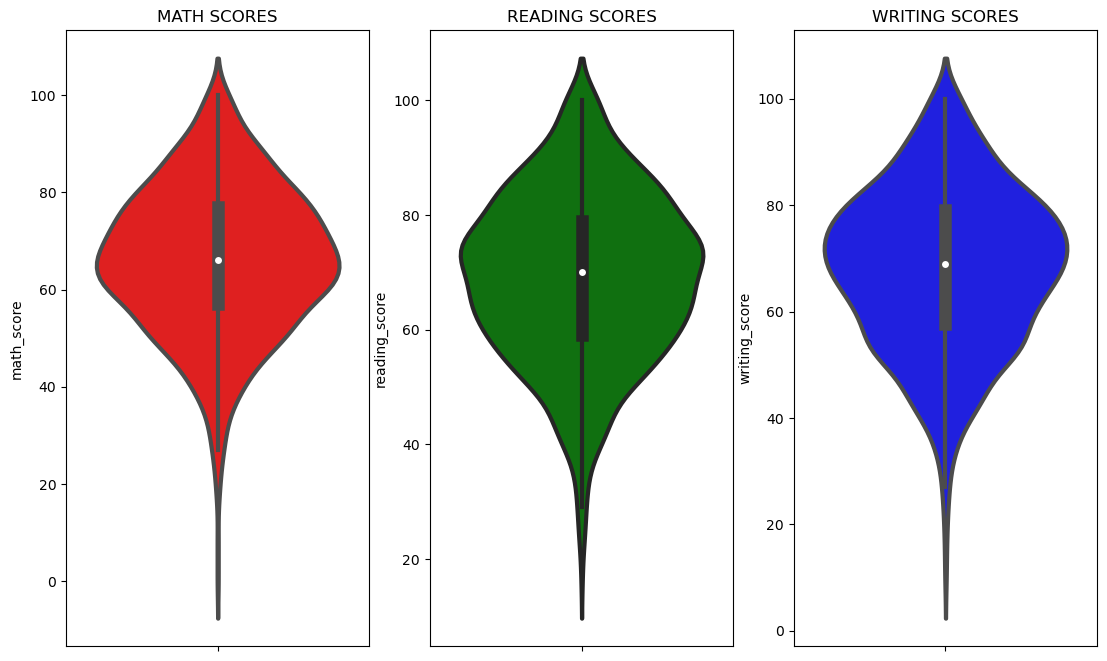

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

The students have got 60-80 marks on an average in math and 50-80 on rest of two.

<h2>Bivariate/Multivariate Analysis</h2>

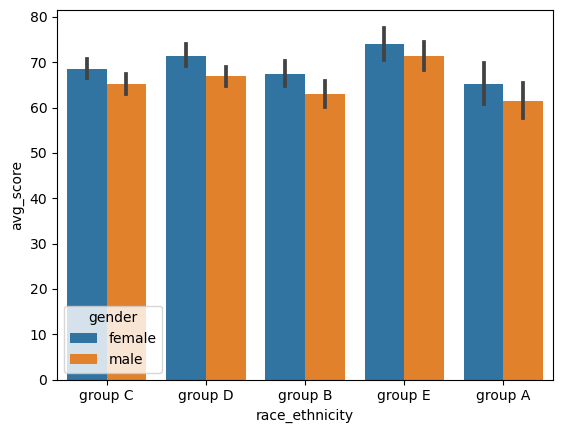

In [22]:
sns.barplot(y=data['avg_score'],x=data['race_ethnicity'],order=data['race_ethnicity'].value_counts().index,hue=data['gender'])
plt.show()

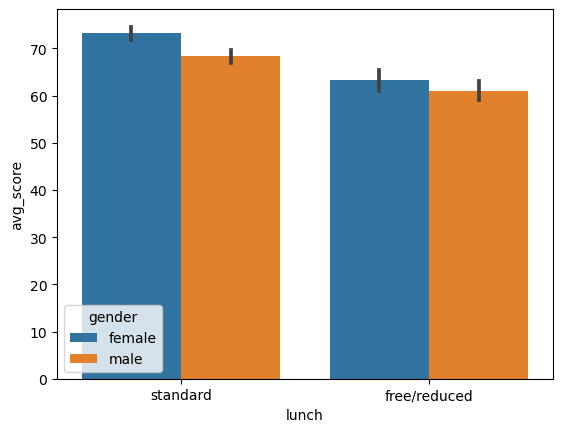

In [23]:
sns.barplot(y=data['avg_score'],x=data['lunch'],hue=data['gender'])
plt.show()

Overall students with standard lunch and gender female performed better.

What is the distribuition of the lunch over race/ethnicity?

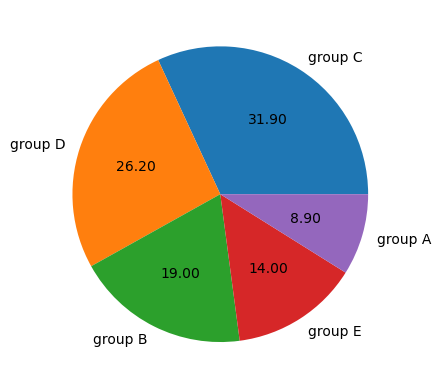

In [24]:
plt.pie(x=data['race_ethnicity'].value_counts().values,labels=data['race_ethnicity'].value_counts().index,autopct="%.2f")
plt.show()

Gathering data of individuals of different race who have free/reduced lunch;

In [47]:
free_lst = []
for classes in data['race_ethnicity'].unique():
    dl = data[data['race_ethnicity'] == classes]
    el = dl[dl['lunch'] == 'free/reduced'].shape[0]
    free_lst.append(el)
print(free_lst)

[69, 114, 36, 95, 41]


Gathering data of individuals of different race who have standard lunch;

In [53]:
standard_lst = []
for i,classes in enumerate(data['race_ethnicity'].unique()):
    standard_lst.append(data[data['race_ethnicity'] == classes].shape[0]-free_lst[i])
print(standard_lst)

[121, 205, 53, 167, 99]


Now we will look at the stacked bar of individuals race and their lunch type

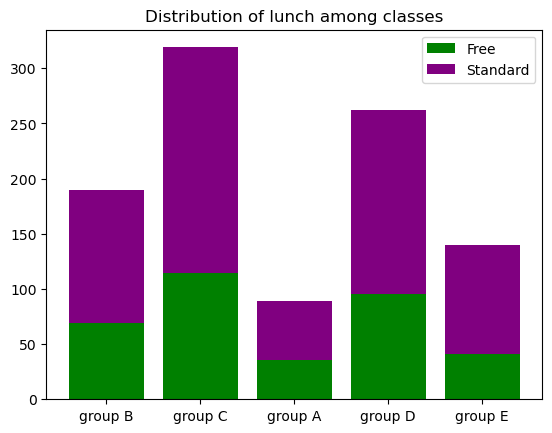

In [64]:
plt.bar(data['race_ethnicity'].unique(),free_lst,label="Free",color='g')
plt.bar(data['race_ethnicity'].unique(),standard_lst,bottom=free_lst,label="Standard",color='purple')
plt.title("Distribution of lunch among classes")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


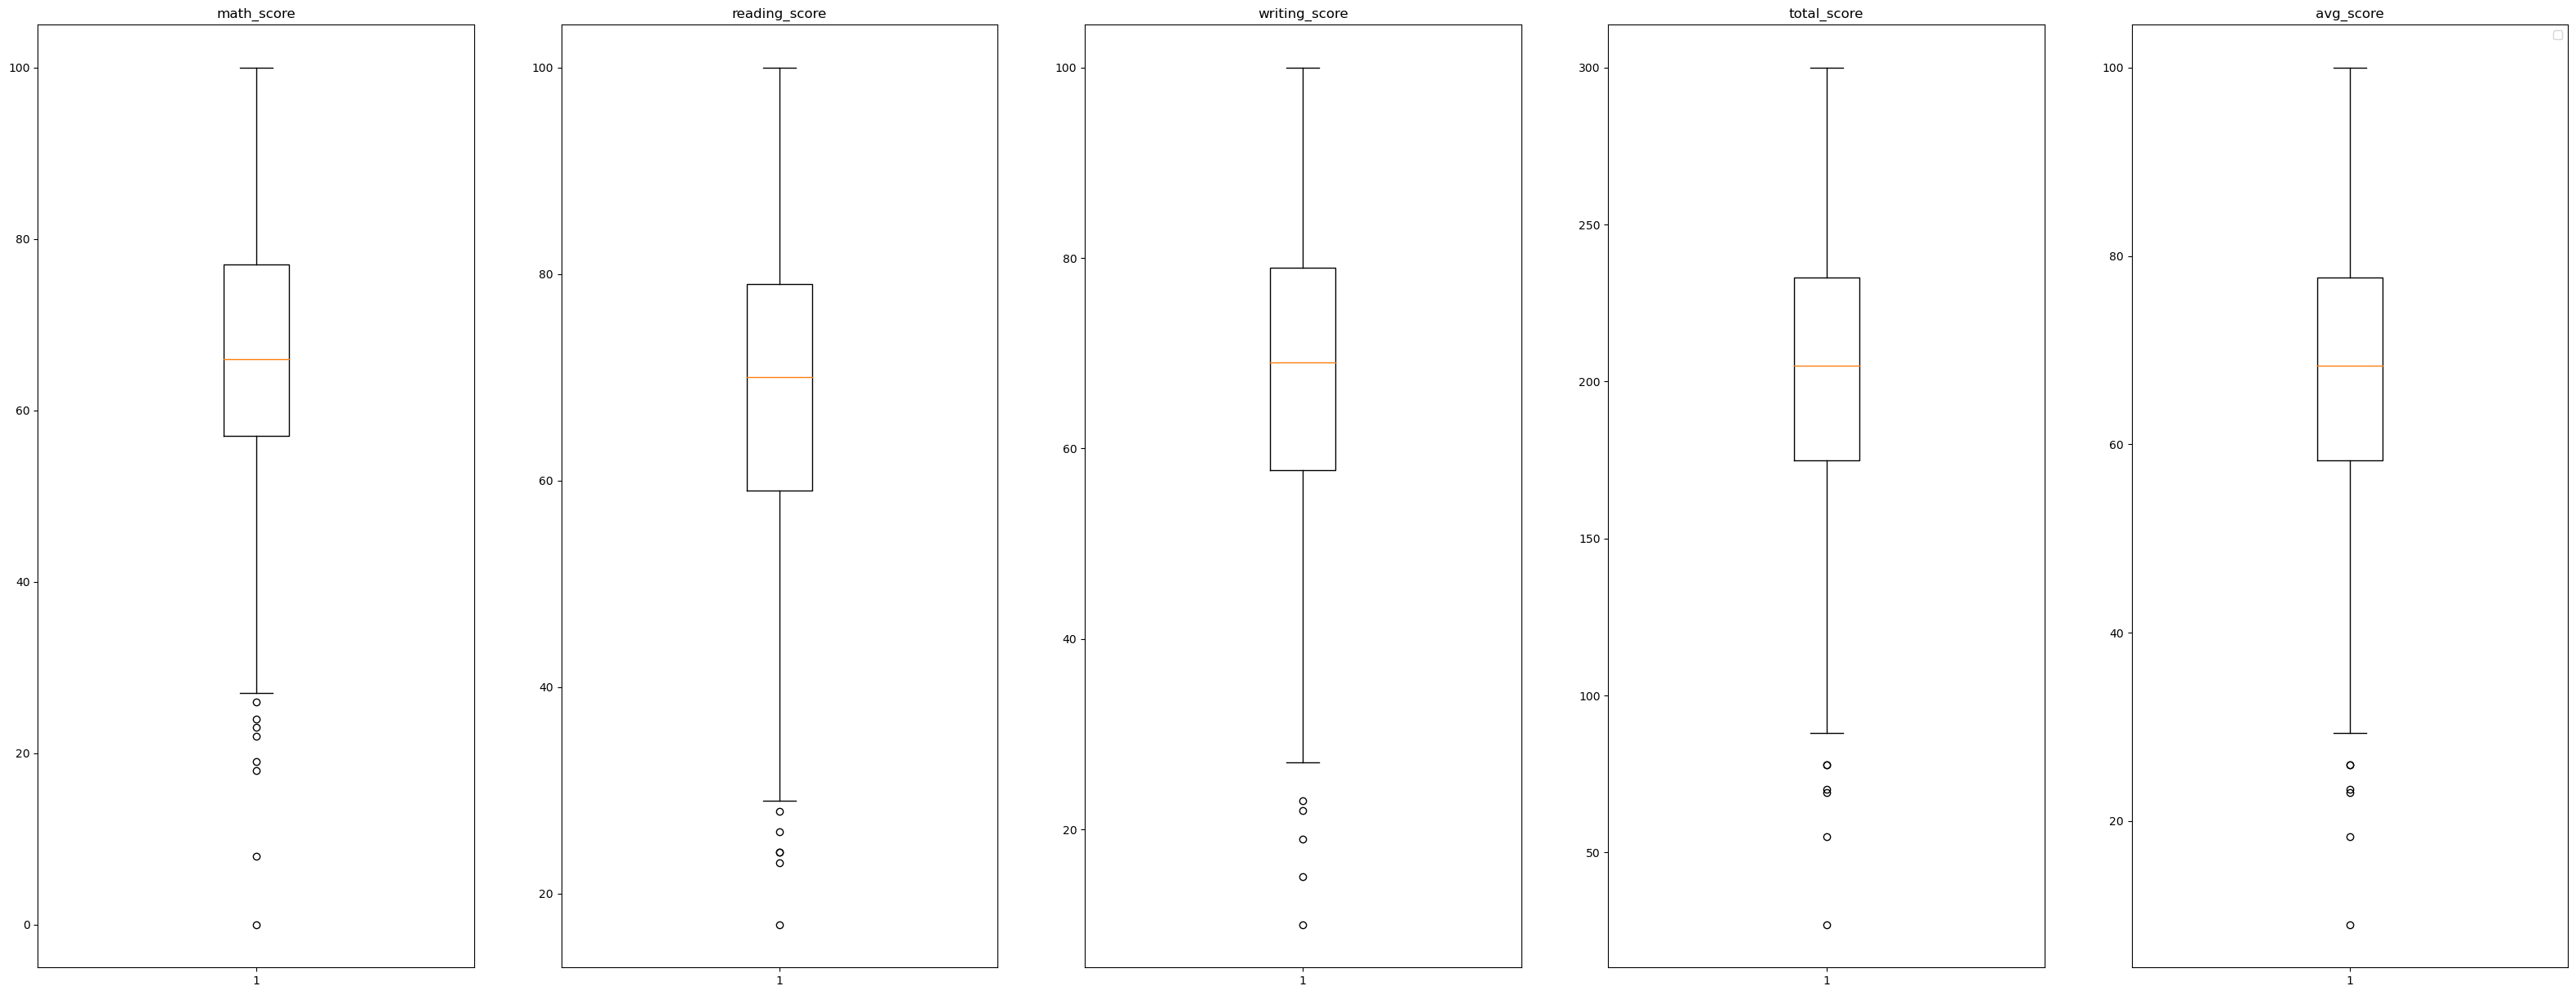

In [86]:
fig,axs=plt.subplots(1,data.select_dtypes(include = [np.int64,np.float64]).shape[1],figsize=(40,15))
for i,numf in enumerate(data.select_dtypes(include = [np.int64,np.float64])):
    axs[i].boxplot(x=data[numf])
    axs[i].set_title(numf)
plt.legend()
# plt.set_title("Box plot for Numberical features")
plt.show()

In [71]:
plt.boxplot?

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   avg_score                    1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


So all the numberical data has the outliers.

Checking the relation between the numerical features.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


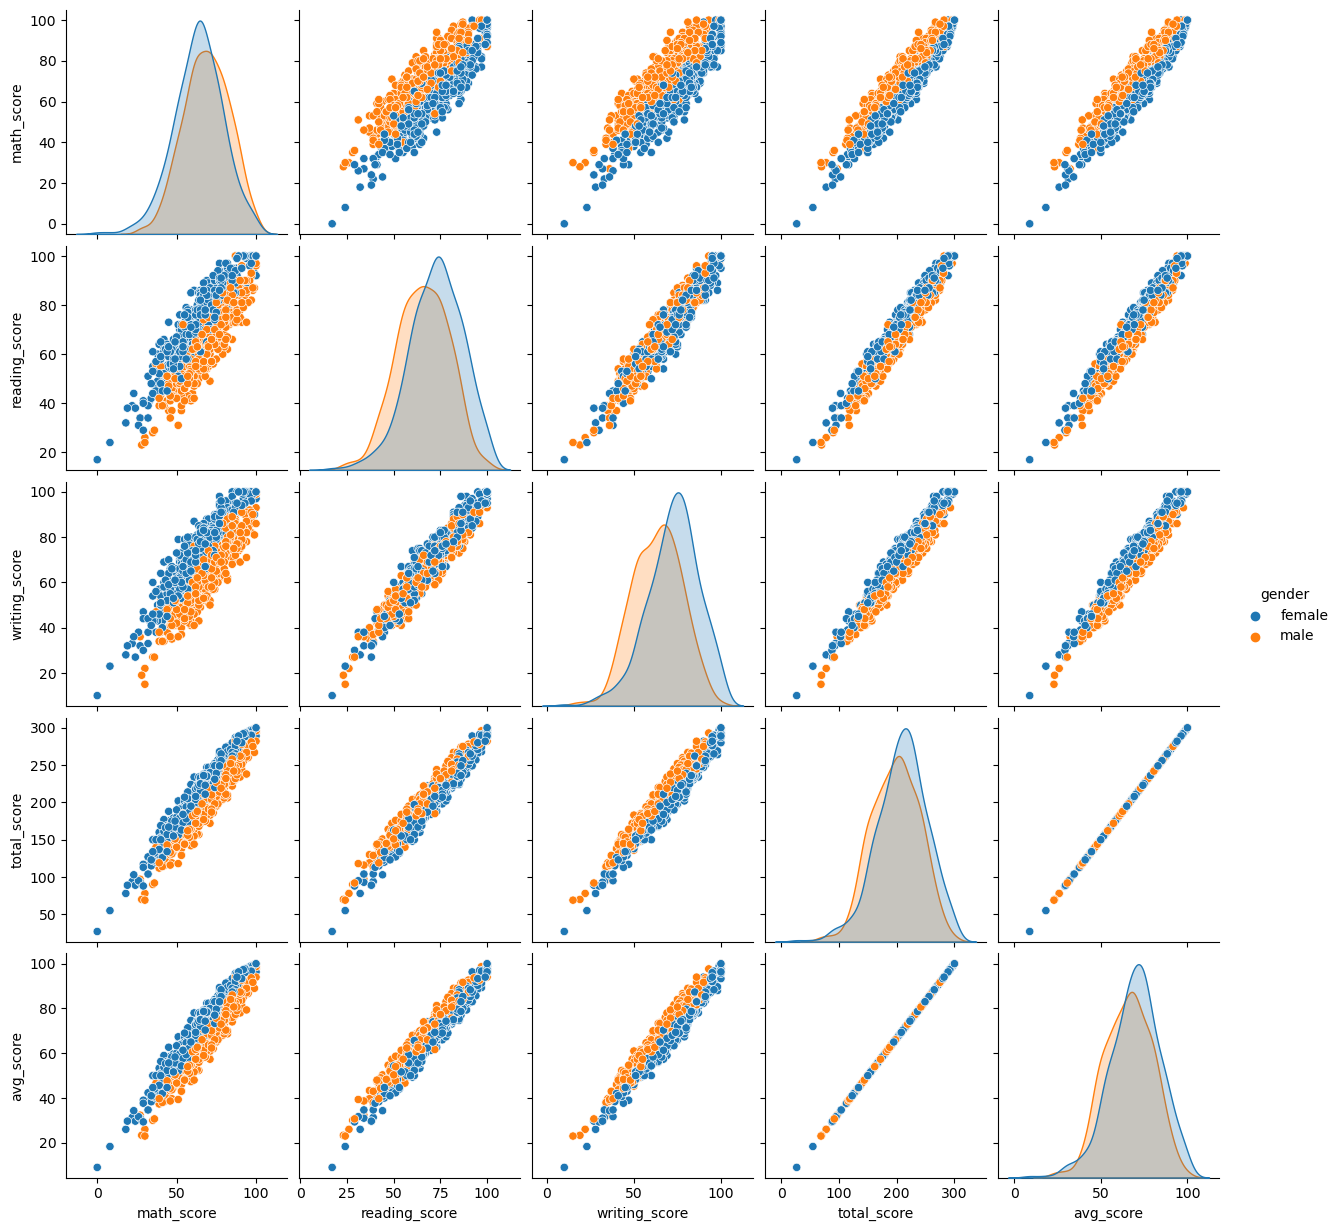

In [95]:
sns.pairplot(data,hue='gender')
plt.show()

All the numerical features are linearly related to each other.

<h3>Conclusion : </h3>

1.Females have scored better than male students.<br>
2.Race/Ethnicity,lunch,test_preparation course are important factors in determining the students performance.<br>
3.Parents education background doesn't affect the scores in an significant level.<br>
4.All the scores are linearly depended to each other.<br>